In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


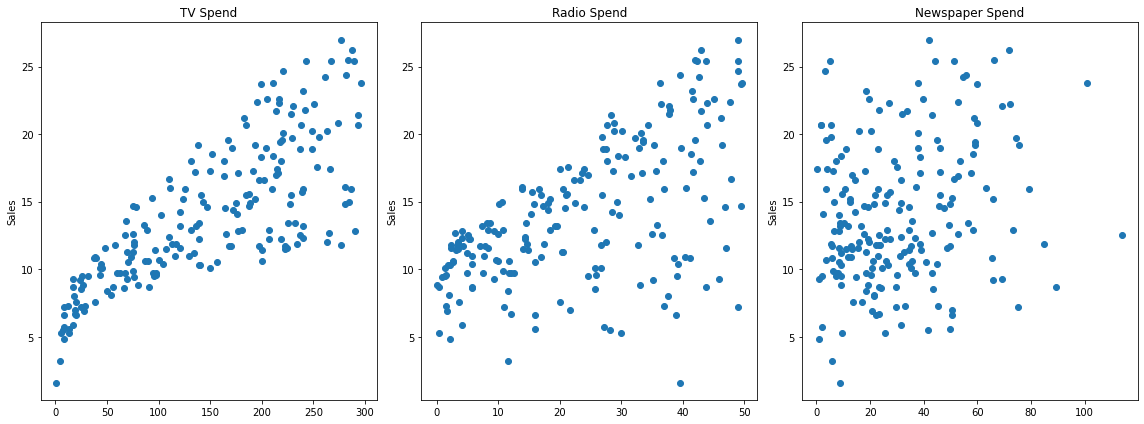

In [3]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

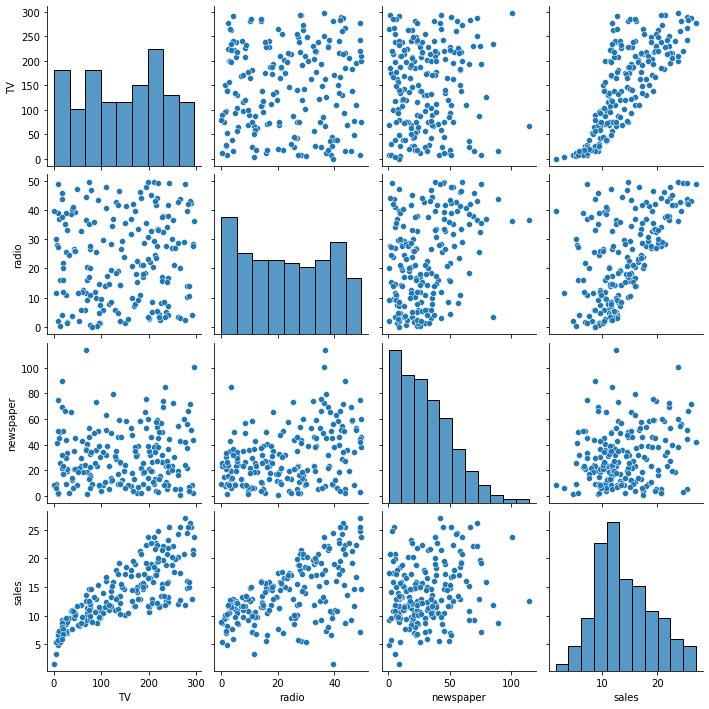

In [4]:
sns.pairplot(df); # This is easiest way.

## Train | Test Split

In [5]:
X = df.drop('sales' , axis = 1)
y = df['sales']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size= 0.2 , random_state=53)

## Model Creating

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lr = LinearRegression()

In [10]:
lr.fit(X_train , y_train)

LinearRegression()

## Model Evaluation

In [11]:
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error

In [12]:
y_pred = lr.predict(X_test)

In [13]:
r2 = r2_score(y_test , y_pred)
mae = mean_absolute_error(y_test , y_pred)
mse = mean_squared_error(y_test , y_pred)
rmse = mean_squared_error(y_test , y_pred)**0.5

In [14]:
print(f"Your Linear Model's r2 score : {r2}")
print(f"Your Linear Model's mae score : {mae}")
print(f"Your Linear Model's mse score : {mse}")
print(f"Your Linear Model's rmse score : {rmse}")

Your Linear Model's r2 score : 0.9255679198924357
Your Linear Model's mae score : 1.1908337679867462
Your Linear Model's mse score : 2.0277364111523504
Your Linear Model's rmse score : 1.4239860993536244


In [15]:
rmse / df['sales'].mean() # You think like % 10 error percentage.

0.10155008731350504

## Plot Residuals

In [16]:
test_residuals = y_test - y_pred

In [17]:
# test_residuals

In [18]:
test_residuals.sum()

0.2571622237067017

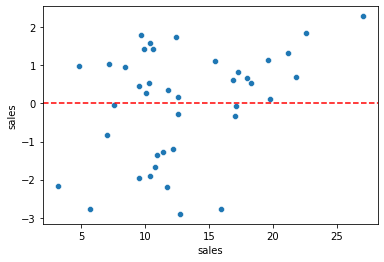

In [19]:
sns.scatterplot(x = y_test , y = test_residuals )
plt.axhline(y = 0 , color ='red' , ls = '--');

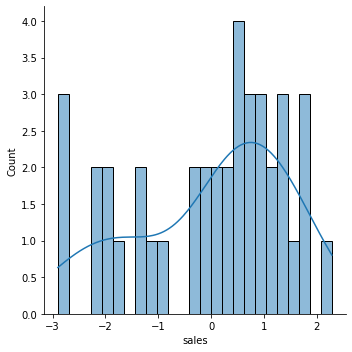

In [20]:
sns.displot(test_residuals , bins = 25 , kde =True);

## Model Deployment

In [21]:
final_model = LinearRegression().fit(X , y)

In [22]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [23]:
from joblib import dump,load

In [24]:
dump(final_model , 'final_sales_model.joblib')

['final_sales_model.joblib']

In [25]:
loaded_model = load('final_sales_model.joblib')

In [26]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [27]:
guess = [[149,22,12]]

In [28]:
loaded_model.predict(guess)

c:\Users\EmincanY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])

In [ ]:
# Done